### Цель исследования:
**Проверка гипотез для увеличения выручки**

### Последовательность действий:
**1) подготовка данных
2) применение формул для выполнения исследований
3) приоретизация гипотиз
4) Анализ А/B теста и визуализация полученных результатов
5) Итоговые выводы** 


In [1]:
import pandas as pd
import datetime as dt
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders =  pd.read_csv('/datasets/orders.csv')
visitors =  pd.read_csv('/datasets/visitors.csv')
print(data)
print(orders)
print(visitors)

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  
      transactionId   visitorId        

<div class="alert alert-block alert-info">

 Комментарий студента: добавила все использованные библеотеки в ячейку

</div>

In [2]:
data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

Приведем к нижнему регистру

In [3]:
print(data)

                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


In [4]:
print(data.duplicated().sum(), orders.duplicated().sum(),visitors.duplicated().sum() )


0 0 0


In [5]:
data.isna().sum()


hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [6]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [7]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Проверка на пропуски и дубликаты

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
new_d = (
    orders.groupby('visitorId', as_index=False)
    .agg({'group': 'nunique'})
)
new_d = new_d[new_d['group'] >1]
print(new_d.count())


visitorId    58
group        58
dtype: int64


Получаем, что 58 пользователей значатся в двух группах одновременно, это достаточно большое количество пользователей и терять их скажется на выборке, по-этому оставим их.

Посмотрим на тип данных и исправим их ниже

In [12]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


<div class="alert alert-block alert-info">

Комментарий студента:
Мы завершили пердобработку данных и далее будем переходить к первой части проекта:
    
    
**Приоритизация гипотез.**
</div>

In [14]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis', 'ICE']].sort_values(by ='ICE',ascending = False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


In [15]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))
pd.options.display.max_colwidth = 120

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Применили два фреймворка : ICE и RICE, в ICE входит три параметра, по которым можно определить к какой гипотезе следует перейти в первую очередь: Влияние, легкость реализации и уверенность. в RICE 4 параметра: добавляется еще охват.
на примере мы видим, что при разных фреймворках меняются и положение наших гипотез, так на примере ICE - первая тройка располагается по номерам 8-0-7, в то время как в RICE 7-2-0. Изменение в положениях происходит из - за четвертого параметра, после добавления Охвата положение приоритета в гипотезах меняется.

<div class="alert alert-block alert-info">
Комментарий студента:
Мы завершили первую часть проекта и далее будем переходить ко второй части :
    
    
**Анализ A/B-теста.**</div>

In [16]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(orders.head(5))
print(visitors.head(5))
print(cumulativeData.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756
        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


''

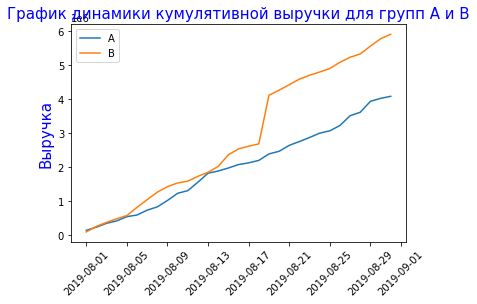

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки для групп А и В', color ='blue', fontsize =15)
plt.ylabel('Выручка',color = 'blue', fontsize = 15)
plt.xticks(rotation = 45)
plt.legend()
;

Группа B значительно лучше растет по выручке, особенно это заметно с 2019-08-17, где идет резкий скачек

<div class="alert alert-block alert-info">
это может говорить нам о наличии аномальных значений в данных, одна из причин - слишком крупный заказ.
</div>

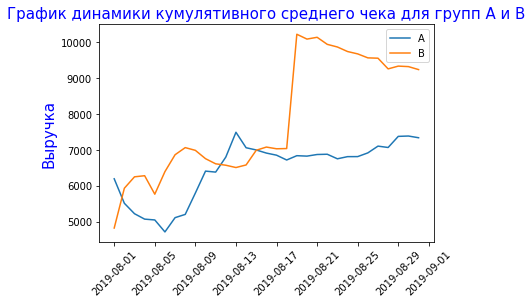

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График динамики кумулятивного среднего чека для групп А и В', color ='blue', fontsize =15)
plt.xticks(rotation = 45)
plt.ylabel('Выручка',color = 'blue', fontsize = 15)
plt.legend()

<div class="alert alert-block alert-info">
как и в предыдущем графике, скорее всего тут аномально большой заказ, что и вызвало резкий скачек в данных    
    
</div>

тут также группа B выигрывает, скачек все в ту же дату 2019-08-17, но после идет небольшой спад

''

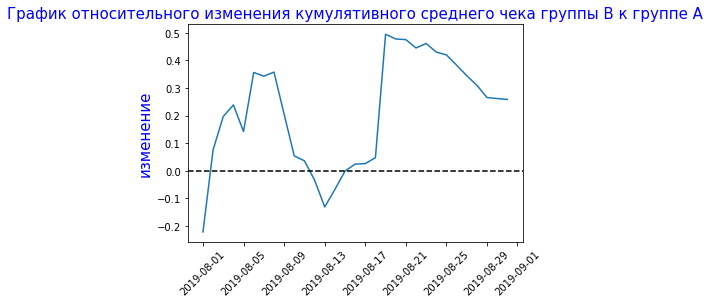

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', color ='blue', fontsize =15)
plt.ylabel('изменение',color = 'blue', fontsize = 15)
;

на графике опять видно, что группа B лучше, группы А.

''

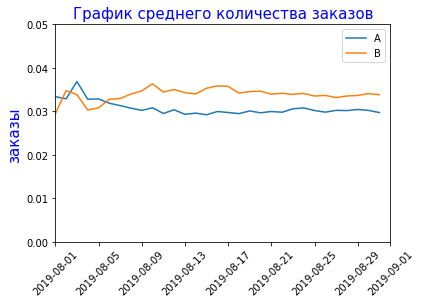

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.title('График среднего количества заказов', color ='blue', fontsize =15)
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 45)
plt.xticks(rotation = 45)
# задаем масштаб осей
plt.axis([dt.datetime(2019,8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.ylabel('заказы',color = 'blue', fontsize = 15)
;

Группа В заметно лучше, чем группа А, это видно уже практически с самого начала наблюдения.

''

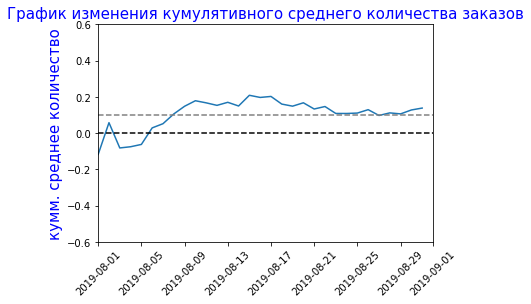

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation = 45)
plt.axis([dt.datetime(2019,8, 1), dt.datetime(2019, 9, 1), -0.6, 0.6])
plt.ylabel('кумм. среднее количество',color = 'blue', fontsize = 15)

plt.title('График изменения кумулятивного среднего количества заказов', color ='blue', fontsize =15)
;

Резкий скачек только в начале графика, двлее достаточно плавный переход наблюдаем

In [22]:



ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


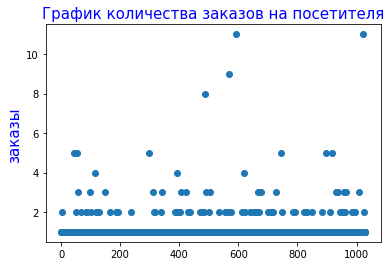

In [23]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.ylabel('заказы',color = 'blue', fontsize = 15)
plt.title('График количества заказов на посетителя', color ='blue', fontsize =15)
plt.scatter(x_values, ordersByUsers['orders']);

In [24]:

print(np.percentile(ordersByUsers['orders'], [ 95, 99]))

[2. 4.]


Большинство пользователей имеют всего один заказ, но также есть и с большим количеством. при расчете перцентиля 95 и 99, видим, что не более 5% пользователей имеют 2 заказа и не более 1% имеют 4 в таком случае выберем аномальными значениями 3 заказов для каждого пользователя

<div class="alert alert-block alert-info">
Здесь примем за аномалии тех пользователей, что имеют больше двух заказов
</div>

''

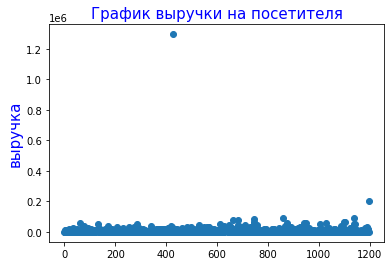

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'] )))
plt.ylabel('выручка',color = 'blue', fontsize = 15)
plt.title('График выручки на посетителя', color ='blue', fontsize =15)
plt.scatter(x_values, orders['revenue'])
;

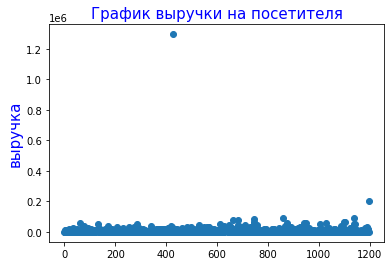

In [26]:
x_values = pd.Series(range(0,len(orders['revenue']  )))
plt.ylabel('выручка',color = 'blue', fontsize = 15)
plt.title('График выручки на посетителя', color ='blue', fontsize =15)
plt.scatter(x_values, orders['revenue'] )

Построим график распределения по суммам заказа, видим, что в основном все покупки были до 20.000. Также, есть и более дорогие заказы

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже  58233.2 рублей
за аномальные значения будем принимать суммы выше 30.000

<div class="alert alert-block alert-info">
Исправим и за аномалии примем сумму дороже 28.000
</div>

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']



In [30]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [31]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<div class="alert alert-block alert-info">
 Сформулируем нулевую и альтернативную гипотезу:
Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов между группами есть. 
</div>

In [32]:

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


Первое число более 0.05, а значит нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - мы не отвергаем.
Выигрыш группы B - равен 13.8%

Теперь мы будем проверять статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [33]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value 0.729, что больше, чем 0.05, cледовательно  мы не будем отвергать нулевую гипотезу и считаем, что в среднем чеке различий нет. Впрочем, средний чек группы А  ниже среднего чека группы B.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


<div class="alert alert-block alert-info">
теперь у нас 74 аномальных значения</div>

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


узнаем, как поменялись результаты нашего теста, после подсчета аномальных значений:
Результаты по среднему количеству заказов практически не изменились. 

In [36]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P.value увеличился, а разница между сегментами сократилась.


После получения всех данных, мы можем принимать решение об остановке теста и признать группу В лучше, чем группа А.
Так как по полученным графикам, мы видим превосходство этой группы в подавляющем количестве.


<div class="alert alert-block alert-info">

Большая относительная разница при отсутствии статистической значимости указывает на влияние выбросов на метрику, к таким мы можем относить большие суммы или наоборот большие по числу заказов данных,
Мы использовали несколько тестов, в которых сравнивали средние значения по двум показателям: сумма выручки и числу заказу, в результате выявили то, что группа В приносит большую выгоду, по сравнению с группой А,
Например, . Выигрыш группы B - равен 13.8%  мы получили этот результат по среднему числу заказов,    
25,9% выигрыш группы В по значениям среднего чека
Эти данные уже могут нам прояснить ситуацию на положение дел, группа В превзошла группу А по этим признакам.

</div>